In [1]:
import numpy as np
import cmath
import matplotlib.pyplot as plt 
%config InlineBackend.figure_format = 'retina'


In [2]:
# Set plotting parameters

params = { 'figure.figsize': (6.0,4.0),
          'axes.labelsize': 21,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'legend.fontsize': 15.5,
#           'xtick.major.pad': 6,
#           'ytick.major.pad': 6,
#           'xtick.major.size': 5,
#           'ytick.major.size': 5,
#           'xtick.minor.size': 3,      # minor tick size in points
#           'xtick.major.width': 1.,    # major tick width in points
#           'xtick.minor.width': .2,    # minor tick width in points
#           'ytick.minor.size': 3,      # minor tick size in points
#           'ytick.major.width': 1.,    # major tick width in points
#           'ytick.minor.width': 1.,    # minor tick width in points
          #'tick.labelsize': 'small'
           }

 

plt.rcParams.update(params)
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})


In [3]:
#setting up Euler

In [4]:
def Eul(f,x0,la, t_end, t_step):
    x = [x0]
    s = 0
    while s < t_end + t_step:
        x.append(x[-1] + np.array(f(x[-1], la))*t_step)
        s = s+t_step
    return x
    

In [5]:
#setting up augmented configuration with core of three cells

In [6]:
a=-5
b=10
c=12
d=14
e=-1

def h(x):
    return np.sin(x)+1*np.cos(x)-1

def F(Y,X,la):
    return a*Y+e*(h(b*X[0]-c*X[1])+h(b*X[2]-c*X[3])+h(b*X[4]-c*X[5]))+d*la

def diamond(V,Z,la):
    X = Z[0:3]
    Y = Z[3:5]
    x0dot, x1dot, x2dot = V(X, la)
    y0dot = F(Y[0], [X[0], X[1], X[1], X[2], X[2], X[0]], la)
    y1dot = F(Y[1], [X[0], X[2], X[1], X[0], X[2], X[1]], la)
    return [x0dot, x1dot, x2dot, y0dot, y1dot]


In [8]:
#setting up limit point for each value of lambda

In [9]:
def lambdattrac(W, x0, lalist, t_end, t_step):
    x = []
    for la in lalist:
        x.append((Eul(W,x0,la, t_end, t_step))[-1])
    return x

In [10]:
#first example: generalized feedforward core

In [11]:
Am = -1
Bm = -Am
Cm = -1
Am_xla = 8
Am_xx = 4

def Gm(X, la):
    return Am*X[0]+Bm*X[1]+Cm*X[2]+Am_xla*la*X[0]+Am_xx*X[0]**2

def Vm(X, la):
    x0dot = Gm([X[0], X[0], X[0]],la)
    x1dot = Gm([X[1], X[1], X[0]],la)
    x2dot = Gm([X[2], X[1], X[2]],la)
    return [x0dot, x1dot, x2dot]

def Vd_m(Z,la):
    return diamond(Vm,Z,la)

In [12]:
x_st_m = [0.1, -0.2, 0.3, 0.4 ,0.5]

la_init_m = -0.03
la_final_m = 0.03
la_step_m = 0.0001
la_list_m = np.arange(la_init_m, la_final_m, la_step_m)



In [13]:
zm = lambdattrac(Vd_m, x_st_m, la_list_m, 2000, 0.1)

xm_0 = [s[0] for s in zm]
xm_1 = [s[1] for s in zm]
xm_2 = [s[2] for s in zm]
ym_0 = [s[3] for s in zm]
ym_1 = [s[4] for s in zm]


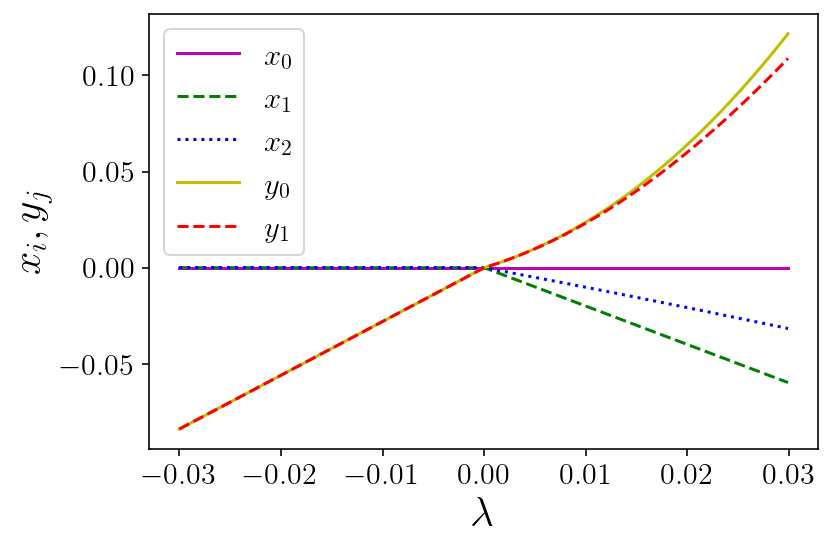

In [14]:
fig, ax = plt.subplots()

line1, = ax.plot(la_list_m, xm_0,'m', label=r'$x_{0}$')
line2, = ax.plot(la_list_m, xm_1,'g--', label=r'$x_{1}$')
line3, = ax.plot(la_list_m, xm_2,'b:', label=r'$x_{2}$')
line4, = ax.plot(la_list_m, ym_0,'y', label=r'$y_{0}$')
line5, = ax.plot(la_list_m, ym_1,'r--', label=r'$y_{1}$')

ax.legend()
plt.title('')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$x_{i}, y_{j}$')


#plt.savefig('branches_m_eq.pdf', bbox_inches='tight', dpi = 600)
plt.show()

In [15]:
diff_m = np.array(ym_0) - np.array(ym_1)

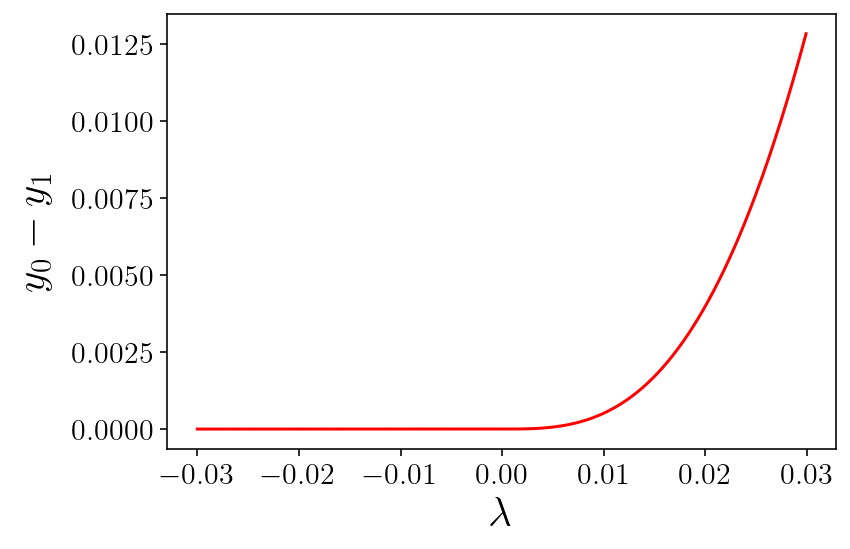

In [16]:
fig, ax = plt.subplots()

line1, = ax.plot(la_list_m, diff_m,'r', label=r'$y_{0}$')




plt.title('')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$y_{0}-y_{1}$', labelpad=10)


#plt.savefig('diff_m_eq.pdf', bbox_inches='tight', dpi = 600)
plt.show()

In [17]:
p_m = np.log(0.0005)
q_m = np.log(0.03)
la_step_log_m = (q_m-p_m)/600
la_log_m = np.arange(p_m, q_m+la_step_log_m, la_step_log_m)

la_unlog_m = np.exp(la_log_m)

In [18]:
zlogm = lambdattrac(Vd_m, x_st_m, la_unlog_m, 2000, 0.1)

ylm_0 = [s[3] for s in zlogm]
ylm_1 = [s[4] for s in zlogm]

diff_l_m = np.array(ylm_0) - np.array(ylm_1)
digg_l_log_m = np.log(diff_l_m)



In [19]:
illuslam = [la_log_m[0], -6]
illuslogm = [3*la_log_m[0]+7, 3*(-6)+7]

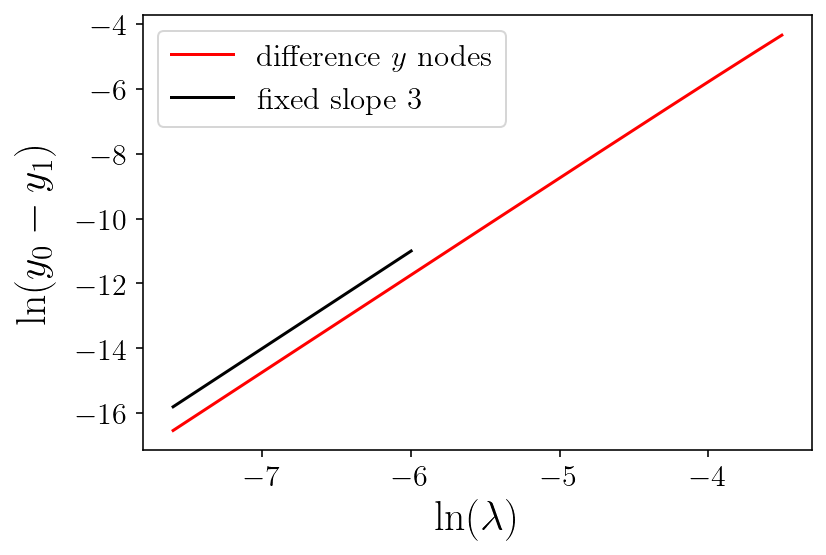

In [20]:


fig, ax = plt.subplots()


line1, = ax.plot(la_log_m, digg_l_log_m,'r', label=r'difference $y$ nodes')
line2, = ax.plot(illuslam, illuslogm, 'k', label=r'fixed slope $3$')


ax.legend()
plt.title('')
plt.xlabel(r'ln$(\lambda)$')
plt.ylabel(r'ln$(y_{0}-y_{1})$', labelpad=10)


#plt.savefig('log_m_eq.pdf', bbox_inches='tight', dpi = 600)
plt.show()

In [21]:
#second example: a disconnected core network

In [22]:
A_c = -1
Ac_xla = 1
Ac_xx = -1



def Gc(X,la):
    return A_c*(X[0] + X[1]) + Ac_xla*la*X[0] + Ac_xx*X[0]**3

def Vc(X, la):
    x0dot = Gc([X[0], X[1]],la)
    x1dot = Gc([X[1], X[0]],la)
    x2dot = Gc([X[2], X[2]],la)
    return [x0dot, x1dot, x2dot]

def Vd_c(Z,la):
    return diamond(Vc,Z,la)

In [23]:
x_st_c = [0.1, -0.2, 0.3, 0.4 ,0.5]

la_init_c = -0.03
la_final_c = 0.03
la_step_c = 0.0001
la_list_c = np.arange(la_init_c, la_final_c, la_step_c)







In [24]:
zc = lambdattrac(Vd_c, x_st_c, la_list_c, 5000, 0.1)

xc_0 = [s[0] for s in zc]
xc_1 = [s[1] for s in zc]
xc_2 = [s[2] for s in zc]
yc_0 = [s[3] for s in zc]
yc_1 = [s[4] for s in zc]


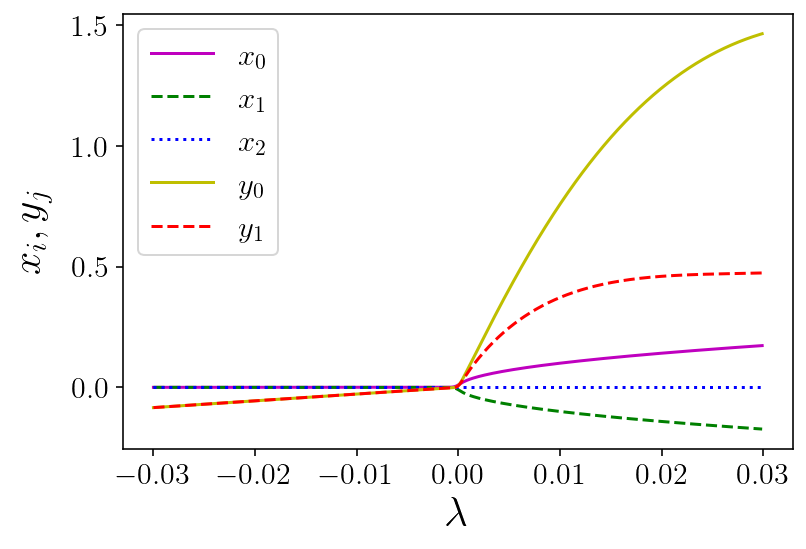

In [25]:
fig, ax = plt.subplots() 

line1, = ax.plot(la_list_c, xc_0,'m', label=r'$x_{0}$')
line2, = ax.plot(la_list_c, xc_1,'g--', label=r'$x_{1}$')
line3, = ax.plot(la_list_c, xc_2,'b:', label=r'$x_{2}$')
line4, = ax.plot(la_list_c, yc_0,'y', label=r'$y_{0}$')
line5, = ax.plot(la_list_c, yc_1,'r--', label=r'$y_{1}$')


ax.legend()
plt.title('')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$x_{i}, y_{j}$', labelpad=10)



#plt.savefig('branches_c.pdf', bbox_inches='tight', dpi = 600)
plt.show()


In [26]:
diff_c = np.array(yc_0) - np.array(yc_1)

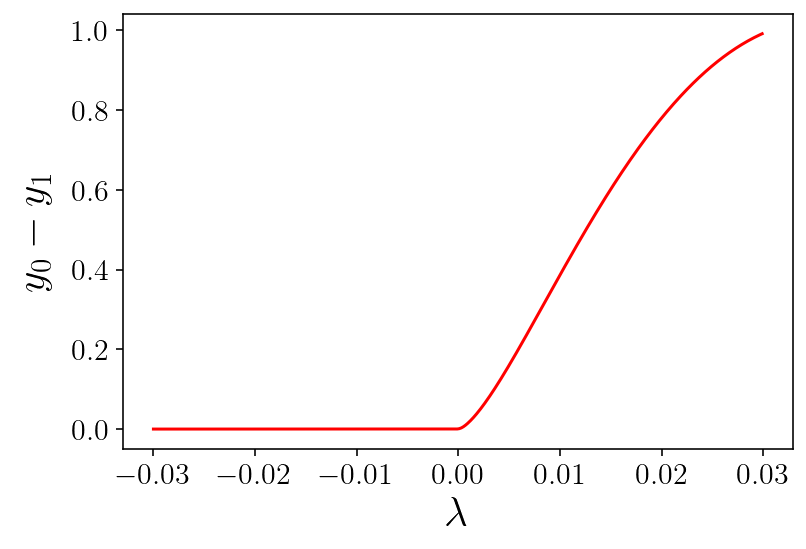

In [27]:
fig, ax = plt.subplots()

line1, = ax.plot(la_list_c, diff_c,'r', label=r'$y_{0}$')




plt.title('')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$y_{0}-y_{1}$', labelpad=10)


#plt.savefig('diff_c.pdf', bbox_inches='tight', dpi = 600)
plt.show()

In [28]:
p_c = np.log(0.0005)
q_c = np.log(0.03)
la_step_log_c = (q_c-p_c)/600
la_log_c = np.arange(p_c, q_c+la_step_log_c, la_step_log_c)

la_unlog_c = np.exp(la_log_c)

In [29]:
zlogc = lambdattrac(Vd_c, x_st_c, la_unlog_c, 5000, 0.1)

ylc_0 = [s[3] for s in zlogc]
ylc_1 = [s[4] for s in zlogc]

diff_l_c = np.array(ylc_0) - np.array(ylc_1)
digg_l_log_c = np.log(diff_l_c)



In [31]:
illuslac = [la_log_c[0], -6]
illuslogc = [1.5*la_log_c[0]+6.58, 1.5*(-6)+6.58]

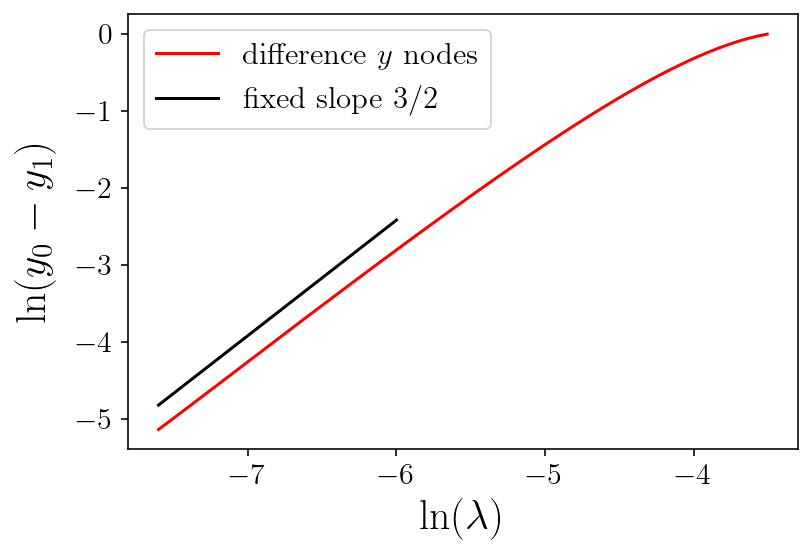

In [32]:


fig, ax = plt.subplots()


line1, = ax.plot(la_log_c, digg_l_log_c,'r', label=r'difference $y$ nodes')
line2, = ax.plot(illuslac, illuslogc, 'k', label=r'fixed slope $3/2$')


ax.legend()
plt.title('')
plt.xlabel(r'ln$(\lambda)$')
plt.ylabel(r'ln$(y_{0}-y_{1})$', labelpad=10)


#plt.savefig('log_c.pdf', bbox_inches='tight', dpi = 600)

plt.show()

In [35]:
#third example: already reluctancy in the core

In [36]:
Br = -0.55
Cr = 0.25
Ar_xla = 1.5
Ar_xx = -0.1


def Gr(X,la):
    return Br*X[1]+Cr*X[2]+Ar_xla*la*X[0]+Ar_xx*X[0]**2


def Vr(X, la):
    x0dot = Gr([X[0], X[1], X[0]],la)
    x1dot = Gr([X[1], X[2], X[0]],la)
    x2dot = Gr([X[2], X[2], X[0]],la)
    return [x0dot, x1dot, x2dot]

def Vd_r(Z,la):
    return diamond(Vr,Z,la)

In [38]:
x_st_r = [0.1, -0.2, 0.3, 0.4 ,0.5]

la_init_r = -0.03
la_final_r = 0.03
la_step_r = 0.0001
la_list_r = np.arange(la_init_r, la_final_r, la_step_r)







In [39]:
zr = lambdattrac(Vd_r, x_st_r, la_list_r, 5000, 0.1)

xr_0 = [s[0] for s in zr]
xr_1 = [s[1] for s in zr]
xr_2 = [s[2] for s in zr]
yr_0 = [s[3] for s in zr]
yr_1 = [s[4] for s in zr]


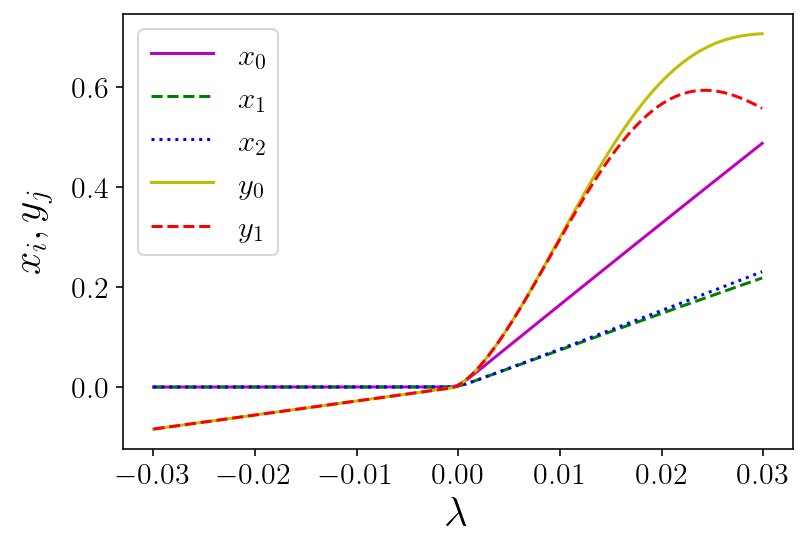

In [40]:
fig, ax = plt.subplots() 

line1, = ax.plot(la_list_r, xr_0,'m', label=r'$x_{0}$')
line2, = ax.plot(la_list_r, xr_1,'g--', label=r'$x_{1}$')
line3, = ax.plot(la_list_r, xr_2,'b:', label=r'$x_{2}$')
line4, = ax.plot(la_list_r, yr_0,'y', label=r'$y_{0}$')
line5, = ax.plot(la_list_r, yr_1,'r--', label=r'$y_{1}$')


ax.legend()
plt.title('')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$x_{i}, y_{j}$', labelpad=10)



#plt.savefig('branches_r.pdf', bbox_inches='tight', dpi = 600)
plt.show()


In [41]:
diff_x_r = np.array(xr_2) - np.array(xr_1)
diff_y_r = np.array(yr_0) - np.array(yr_1)

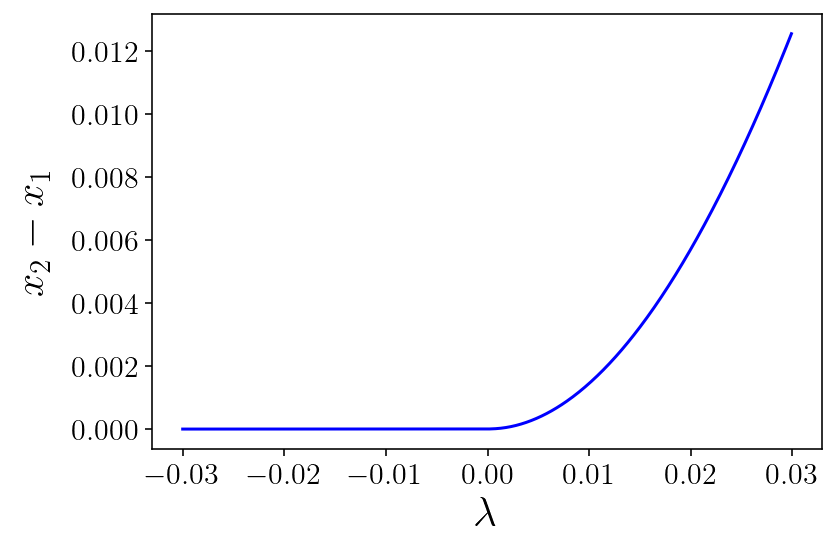

In [42]:
fig, ax = plt.subplots()

line1, = ax.plot(la_list_r, diff_x_r,'b', label=r'$y_{0}$')




plt.title('')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$x_{2}-x_{1}$', labelpad=10)


#plt.savefig('diff_r_x.pdf', bbox_inches='tight', dpi = 600)
plt.show()

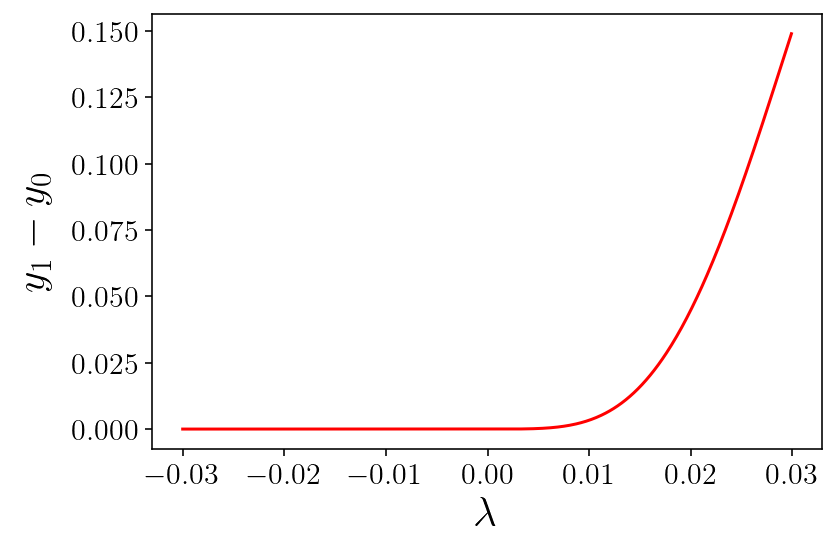

In [43]:
fig, ax = plt.subplots()

line1, = ax.plot(la_list_r, diff_y_r,'r', label=r'$y_{0}$')




plt.title('')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$y_{1}-y_{0}$', labelpad=10)


#plt.savefig('diff_r_y.pdf', bbox_inches='tight', dpi = 600)
plt.show()

In [44]:
p_r = np.log(0.0005)
q_r = np.log(0.03)
la_step_log_r = (q_r-p_r)/600
la_log_r = np.arange(p_r, q_r+la_step_log_r, la_step_log_r)

la_unlog_r = np.exp(la_log_r)

In [45]:
zlogr = lambdattrac(Vd_r, x_st_r, la_unlog_r, 15000, 0.1)





In [46]:
xlr_0 = [s[0] for s in zlogr]
xlr_1 = [s[1] for s in zlogr]
xlr_2 = [s[2] for s in zlogr]
ylr_0 = [s[3] for s in zlogr]
ylr_1 = [s[4] for s in zlogr]


diff_lx_r = np.array(xlr_2) - np.array(xlr_1)
digg_lx_log_r = np.log(diff_lx_r)

diff_ly_r = np.array(ylr_0) - np.array(ylr_1)
digg_ly_log_r = np.log(diff_ly_r)

In [48]:
illuslar_x = [la_log_r[0], -6]
illuslogr_x = [2*la_log_r[0]+3.3, 2*(-6)+3.3]

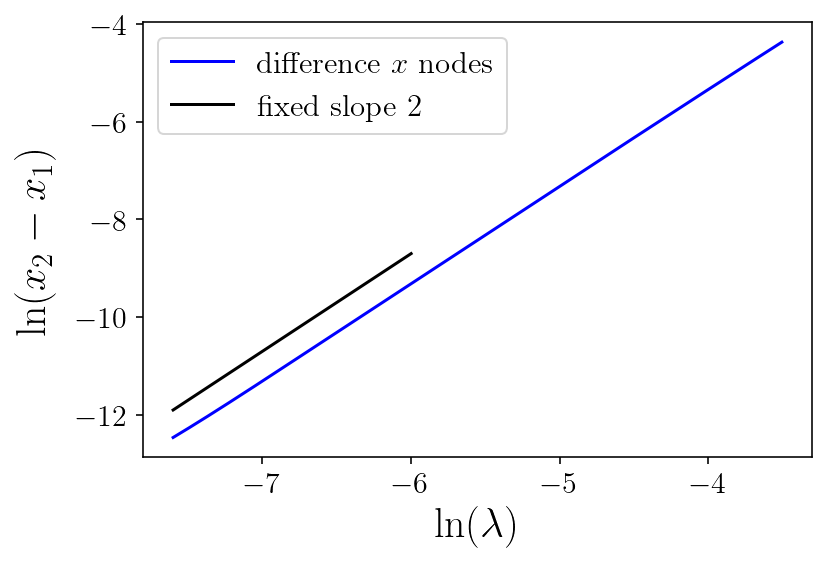

In [49]:


fig, ax = plt.subplots()


line1, = ax.plot(la_log_r, digg_lx_log_r,'b', label=r'difference $x$ nodes')
line2, = ax.plot(illuslar_x, illuslogr_x, 'k', label=r'fixed slope $2$')


ax.legend()
plt.title('')
plt.xlabel(r'ln$(\lambda)$')
plt.ylabel(r'ln$(x_{2}-x_{1})$', labelpad=10)


#plt.savefig('log_r_x.pdf', bbox_inches='tight', dpi = 600)

plt.show()

In [50]:
illuslar_y = [la_log_r[0], -6]
illuslogr_y = [4*la_log_r[0]+14, 4*(-6)+14]

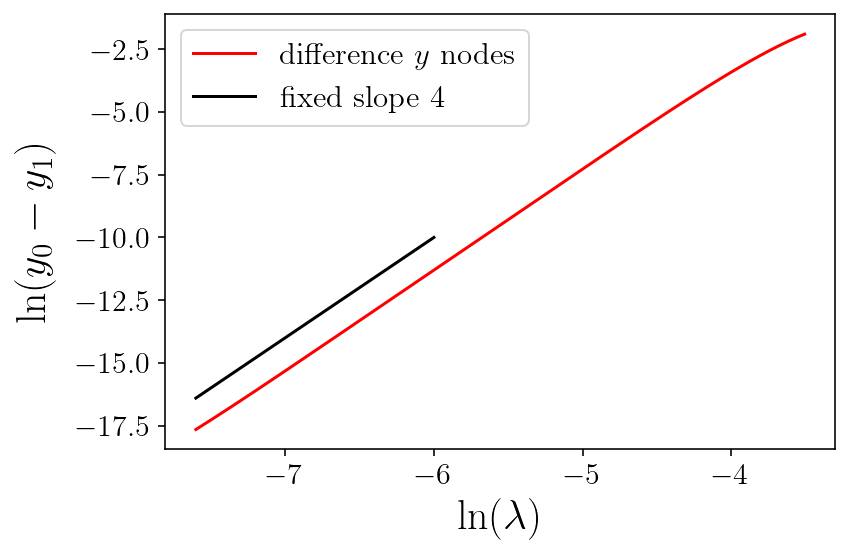

In [51]:


fig, ax = plt.subplots()


line1, = ax.plot(la_log_r, digg_ly_log_r,'r', label=r'difference $y$ nodes')
line2, = ax.plot(illuslar_y, illuslogr_y, 'k', label=r'fixed slope $4$')


ax.legend()
plt.title('')
plt.xlabel(r'ln$(\lambda)$')
plt.ylabel(r'ln$(y_{0}-y_{1})$', labelpad=10)


#plt.savefig('log_r_y.pdf', bbox_inches='tight', dpi = 600)

plt.show()

In [55]:
#fourth example: a core with four nodes

In [56]:
#setting up augmented configuration with core of four cells

In [207]:
a=-5 
b1=120
b2=40
b3=-100
d=-1
e=-0.01

def h(x):
    return np.sin(x)+1*np.cos(x)-1

def even(X):
    return [
    [X[0], X[1], X[2]],
    [X[0], X[2], X[3]],
    [X[0], X[3], X[1]],
    [X[1], X[2], X[0]],
    [X[1], X[0], X[3]],
    [X[1], X[3], X[2]],
    [X[2], X[3], X[0]],
    [X[2], X[1], X[3]],
    [X[2], X[0], X[1]],
    [X[3], X[1], X[0]],
    [X[3], X[2], X[1]],
    [X[3], X[0], X[2]],
    ]

def odd(X):
    return [
    [X[0], X[2], X[1]],
    [X[0], X[3], X[2]],
    [X[0], X[1], X[3]],
    [X[1], X[0], X[2]],
    [X[1], X[3], X[0]],
    [X[1], X[2], X[3]],
    [X[2], X[0], X[3]],
    [X[2], X[3], X[1]],
    [X[2], X[1], X[0]],
    [X[3], X[0], X[1]],
    [X[3], X[1], X[2]],
    [X[3], X[2], X[0]],
    ]

def F0(X):
    s=0
    for Xc in even(X):
        s = s+h(b1*Xc[0]+b2*Xc[1]+b3*Xc[2])
    return s

def F1(X):
    s=0
    for Xc in odd(X):
        s = s+h(b1*Xc[0]+b2*Xc[1]+b3*Xc[2])
    return s


def diamond4(V,Z,la):
    X = Z[0:4]
    Y = Z[4:6]
    x0dot, x1dot, x2dot, x3dot = V(X, la)
    y0dot = a*Y[0] + e*F0(X) + d*la
    y1dot = a*Y[1] + e*F1(X) + d*la
    return [x0dot, x1dot, x2dot, x3dot, y0dot, y1dot]


In [208]:
Bfo = 10
Cfo = -20
Dfo = 15
Efo = -100

def Gfo(X,la):
    return Bfo*X[1]+Cfo*X[2]+Dfo*la*X[0]+Efo*X[0]**2


def Vfo(X, la):
    x0dot = Gfo([X[0], X[1], X[2]],la)
    x1dot = Gfo([X[1], X[2], X[3]],la)
    x2dot = Gfo([X[2], X[3], X[3]],la)
    x3dot = Gfo([X[3], X[3], X[3]],la)
    return [x0dot, x1dot, x2dot, x3dot]

def Vfoaug(Z,la):
    return diamond4(Vfo,Z,la)

In [209]:
x_st_fo = [-0.001, -0.002, -0.003, -0.004, 0.001, 0.002]

la_init_fo = -0.03
la_final_fo = 0.03
la_step_fo = 0.0001
la_list_fo = np.arange(la_init_fo, la_final_fo, la_step_fo)







In [191]:
zfo = lambdattrac(Vfoaug, x_st_fo, la_list_fo, 2000, 0.1) 

xfo_0 = [s[0] for s in zfo]
xfo_1 = [s[1] for s in zfo]
xfo_2 = [s[2] for s in zfo]
xfo_3 = [s[3] for s in zfo]
yfo_0 = [s[4] for s in zfo]
yfo_1 = [s[5] for s in zfo]


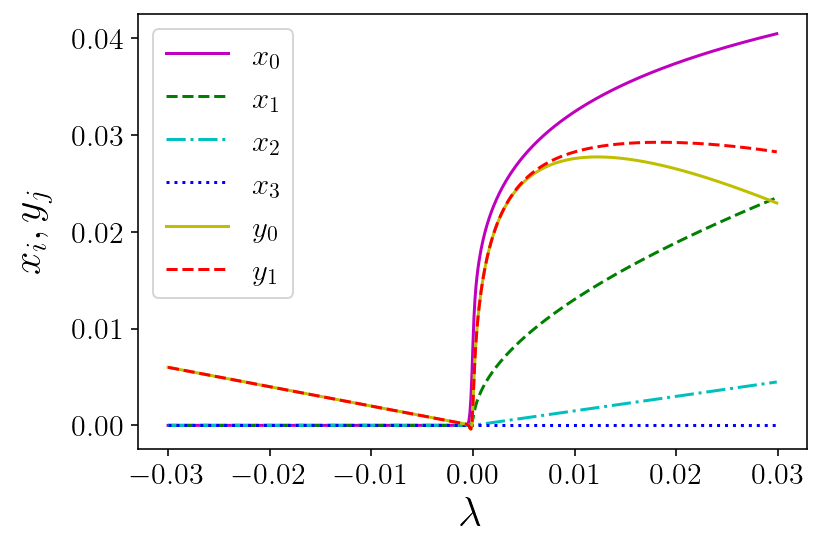

In [204]:
fig, ax = plt.subplots() 

line1, = ax.plot(la_list_r, xfo_0,'m', label=r'$x_{0}$')
line2, = ax.plot(la_list_r, xfo_1,'g--', label=r'$x_{1}$')
line3, = ax.plot(la_list_r, xfo_2,'c-.', label=r'$x_{2}$')
line4, = ax.plot(la_list_r, xfo_3,'b:', label=r'$x_{3}$')
line5, = ax.plot(la_list_r, yfo_0,'y', label=r'$y_{0}$')
line6, = ax.plot(la_list_r, yfo_1,'r--', label=r'$y_{1}$')

ax.legend()
plt.title('')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$x_{i}, y_{j}$', labelpad=10)



#plt.savefig('branches_fo_2.pdf', bbox_inches='tight', dpi = 600)
plt.show()




In [210]:
#setting up the log-log plot

In [211]:
p_fo = np.log(0.00003)
q_fo = np.log(0.03)
la_step_log_fo = (q_fo-p_fo)/100
la_log_fo = np.arange(p_fo, q_fo+la_step_log_fo, la_step_log_fo)

la_unlog_fo = np.exp(la_log_fo)

In [212]:
zfo_log = lambdattrac(Vfoaug, x_st_fo, la_unlog_fo, 20000, 0.1)

xfo_0_log = [s[0] for s in zfo_log]
xfo_1_log = [s[1] for s in zfo_log]
xfo_2_log = [s[2] for s in zfo_log]
xfo_3_log = [s[3] for s in zfo_log]
yfo_0_log = [s[4] for s in zfo_log]
yfo_1_log = [s[5] for s in zfo_log]



In [218]:
ydiff_fo_log = np.log(np.array(yfo_1_log) - np.array(yfo_0_log))

illuslafo_y = [la_log_fo[0], -7]
illuslogfo_y = [ydiff_fo_log[0], ydiff_fo_log[0]-(11/4)*(la_log_fo[0]+7)]

nilluslafo_y = [la_log_fo[0], -7]
nilluslogfo_y = [ydiff_fo_log[0], ydiff_fo_log[0]-(10/4)*(la_log_fo[0]+7)]


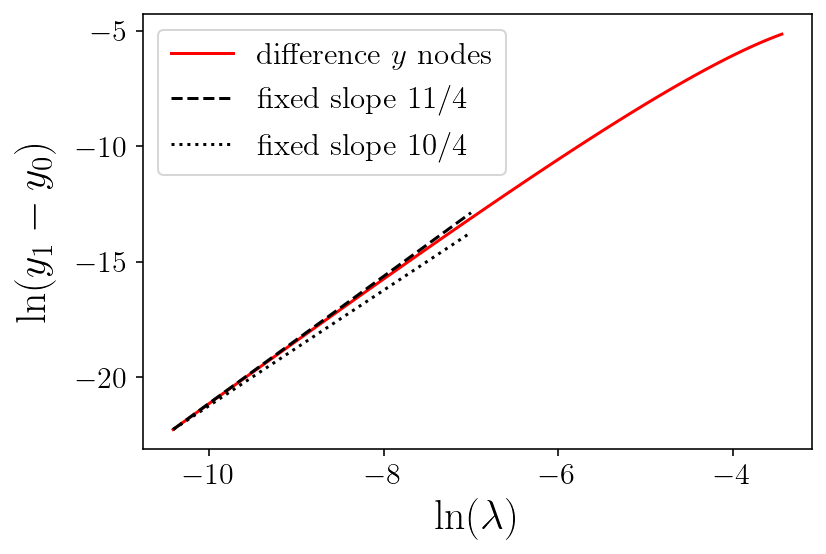

In [222]:
fig, ax = plt.subplots()


line1, = ax.plot(la_log_fo, ydiff_fo_log,'r', label=r'difference $y$ nodes')
line2, = ax.plot(illuslafo_y, illuslogfo_y, 'k--', label=r'fixed slope $11/4$')
line3, = ax.plot(nilluslafo_y, nilluslogfo_y, 'k:', label=r'fixed slope $10/4$')


ax.legend()
plt.title('')
plt.xlabel(r'ln$(\lambda)$')
plt.ylabel(r'ln$(y_{1}-y_{0})$', labelpad=10)


#plt.savefig('log_fo_y_2.pdf', bbox_inches='tight', dpi = 600)

plt.show()